### **Q1:** Mối liên hệ giữa các yếu tố nhân khẩu học (Giới tính, Tuổi tác) và thói quen học tập (Studytime) ảnh hưởng như thế nào đến Hiệu suất Học tập (Learning Efficiency) trong các môn học?

### **The question**
- **Câu hỏi chính:** Mối liên hệ giữa các yếu tố nhân khẩu học (Giới tính, Tuổi tác) và thói quen học tập (Studytime) ảnh hưởng như thế nào đến Hiệu suất Học tập (Learning Efficiency) trong các môn học?

### **Motivation and Benefits**

- Câu hỏi đáng để nghiên cứu:
    + Hiểu rõ hơn về mối quan hệ giữa thời gian học và kết quả học tập để tối ưu hóa chiến lược học tập.
    + Giúp giáo viên và nhà trường thiết kế chương trình giảng dạy phù hợp hơn với từng nhóm học sinh dựa trên đặc điểm nhân khẩu học và thói quen học tập.
    + Cung cấp thông tin hữu ích cho phụ huynh trong việc hỗ trợ con cái trong quá trình học tập.

- Lợi ích và Insight mang lại: 
    + Hiểu rõ hơn về cách các yếu tố nhân khẩu học và thói quen học tập ảnh hưởng đến hiệu suất học tập, từ đó có thể đưa ra các chiến lược cải thiện hiệu quả học tập.
    + Xác định các nhóm học sinh có hiệu suất học tập thấp để có biện pháp hỗ trợ kịp thời.
    + Cung cấp dữ liệu để phát triển các chương trình đào tạo cá nhân hóa dựa trên đặc điểm của từng học sinh.

- Đối tượng quan tâm:

    + Giáo viên và nhà trường: Để cải thiện phương pháp giảng dạy và hỗ trợ học sinh.
    + Phụ huynh: Để hiểu rõ hơn về cách hỗ trợ con cái trong việc học tập.
    + Học sinh: Để nhận thức về thói quen học tập và cách cải thiện hiệu suất học tập của mình.

- Giải quyết vấn đề thực tế:

    + Cung cấp thông tin để thiết kế các chương trình học tập hiệu quả hơn.
    + Giúp học sinh và phụ huynh hiểu rõ hơn về mối quan hệ giữa thói quen học tập và kết quả học tập.
    + Hỗ trợ giáo viên trong việc phát hiện và hỗ trợ những học sinh có hiệu suất học tập thấp.

## **A. Preprocessing**

- Data cleaning: Xử lý dữ liệu trùng lặp, giá trị thiếu, không hợp lệ và ngoại lai
- Data reduction: Lọc chỉ giữ lại các cột cần thiết cho phân tích.
- Feature engineering: Tạo các biến mới như Hiệu suất Học tập (Learning Efficiency) dựa trên điểm số và thời gian học.
- Chuyển đổi mức học tập studytime từ dạng phân loại sang dạng số để dễ dàng phân tích. Thay loại thành trung bình thời gian học mỗi tuần.

In [1]:

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Cấu hình hiển thị
pd.set_option('display.max_columns', None)
sns.set_style("whitegrid")

# Đọc dữ liệu
df = pd.read_csv('../data/raw/student-combine.csv')

In [2]:
# Xử lý trùng lặp
df = df.drop_duplicates()
df = df.reset_index(drop=True)
# Không có giá trị thiếu => bỏ qua
# Xử lý dữ liệu không hợp lệ
df = df[(df['age'] > 0) & (df['G3'] >= 0)]
df = df.reset_index(drop=True)

# Chỉ giữ các cột cần thiết
needed_cols = ['age', 'sex', 'studytime', 'subject', 'G3']
df = df[needed_cols].copy()

# xử lý điểm G3=0
df = df[df['G3'] > 0].copy()

# Thêm cột efficiency = G3 / actual_hours để đánh giá hiệu quả học tập
studytime_to_hours = {
    1: 1.5,   # <2h → midpoint = 1.5h
    2: 3.5,   # 2-5h → midpoint = 3.5h  
    3: 7.5,   # 5-10h → midpoint = 7.5h
    4: 12     # >10h → estimate = 12h
}

df['actual_hours'] = df['studytime'].map(studytime_to_hours)
df['efficiency'] = df['G3'] / df['actual_hours']

print(f"Tổng số học sinh tham gia phân tích: {df.shape[0]}")

Tổng số học sinh tham gia phân tích: 991


## **B. Analysis**

1. **Visualization**: Sử dụng 4 biểu đồ Line Plot để trực quan hóa tương tác giữa các yếu tố

- **Studytime × Gender (Biểu đồ 1 & 2)**: So sánh hiệu suất học tập giữa Nam và Nữ tại từng mức độ thời gian học (studytime) cho môn Toán và Văn.
    * **Chi tiết:** Biểu đồ đường với 2 line (Nữ màu hồng, Nam màu xanh) thể hiện hiệu suất (điểm/giờ) thay đổi qua 4 mức studytime (<2h, 2-5h, 5-10h, >10h). Chúng tôi kỳ vọng quan sát được sự thay đổi khoảng cách giữa 2 đường khi studytime tăng.

- **Studytime × Age (Biểu đồ 3 & 4)**: Phân tích hiệu suất học tập của các nhóm tuổi khác nhau tại từng mức độ studytime cho môn Toán và Văn.
    * **Chi tiết:** Biểu đồ đường với 4 line (Level 1-4) thể hiện hiệu suất của từng mức học qua các nhóm tuổi (15, 16, 17, 18-20, 20+). Giúp xác định nhóm tuổi nào tận dụng thời gian học hiệu quả nhất và ở mức studytime nào.

2. **Kiểm định thống kê**: để xác thực các quan sát rút ra từ biểu đồ, sử dụng kiểm định **T-test** (cho các cột có biến nhị phân) và **ANOVA** (cho các cột có nhiều biến) với ngưỡng tin cậy là 95%

C:\Users\chiph\AppData\Local\Temp\ipykernel_33864\3071980214.py:102: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


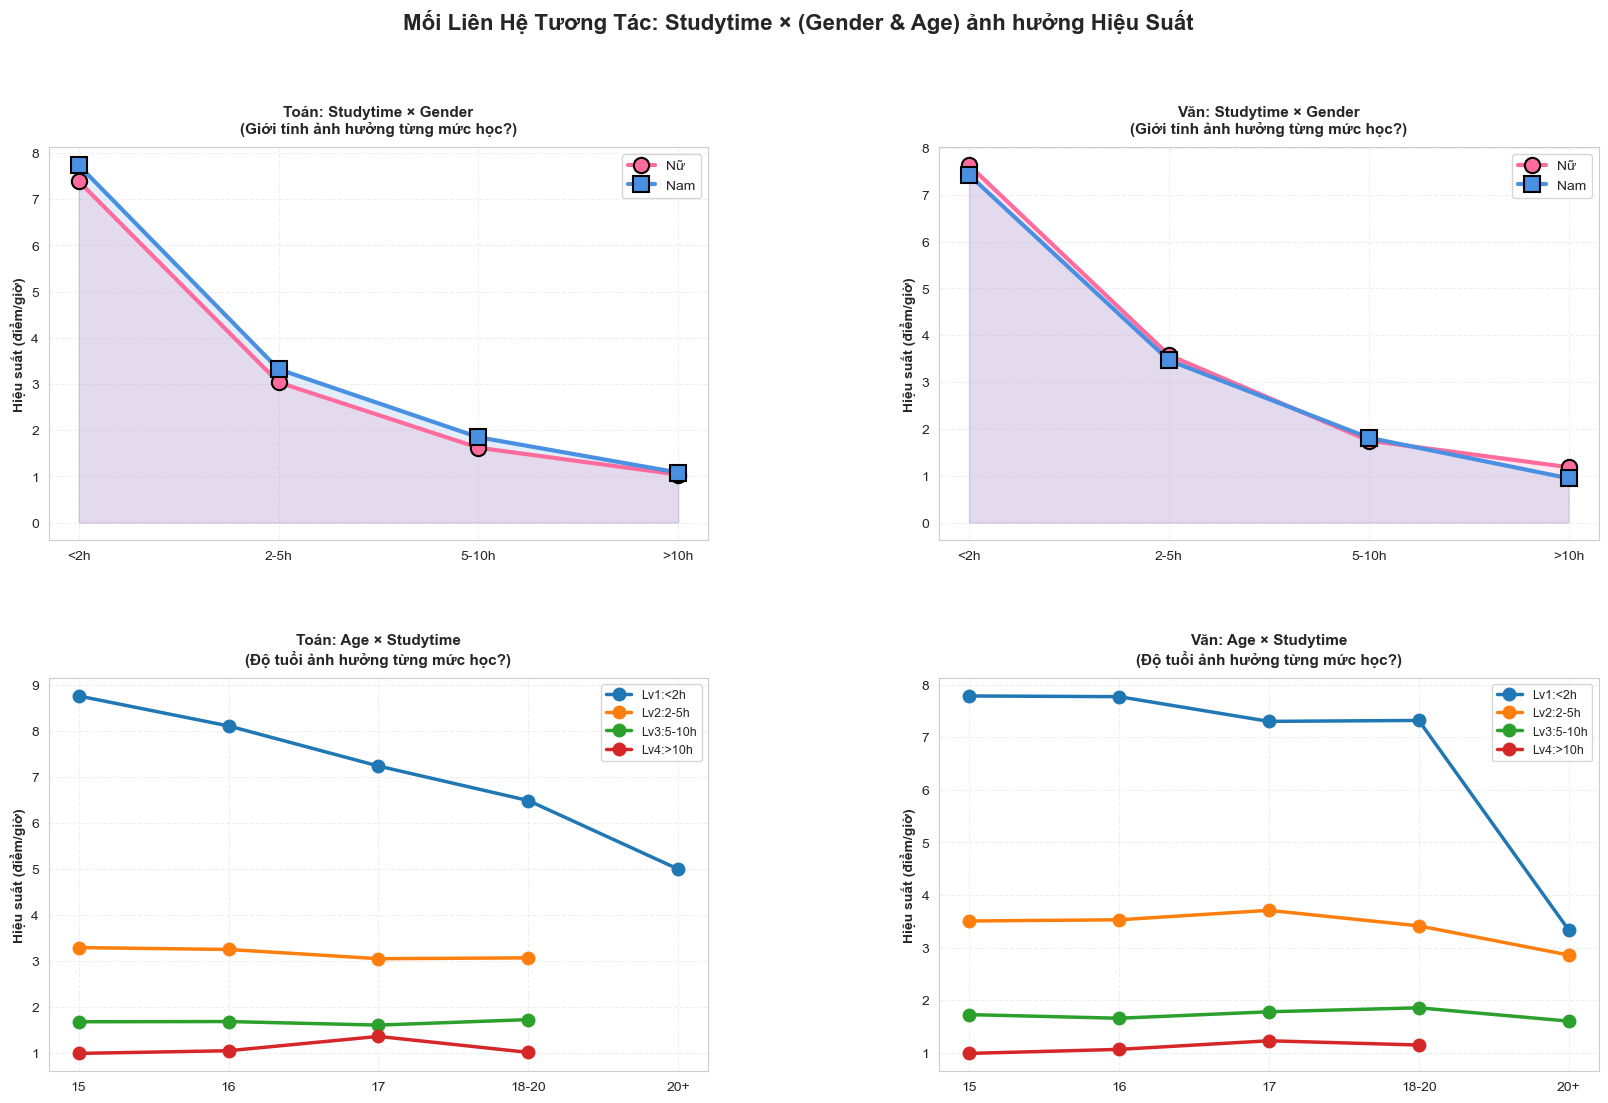

In [3]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import numpy as np

age_groups = [
    (15, 15, '15'), (16, 16, '16'), (17, 17, '17'),
    (18, 20, '18-20'), (21, 25, '20+')]
# 3. VISUALIZATION (GIỮ NGUYÊN)
fig = plt.figure(figsize=(20, 12))
fig.suptitle('Mối Liên Hệ Tương Tác: Studytime × (Gender & Age) ảnh hưởng Hiệu Suất', 
             fontsize=16, fontweight='bold', y=0.995)
gs = fig.add_gridspec(2, 2, hspace=0.35, wspace=0.35)

# ========== BIỂU ĐỒ 1: Studytime × Gender (Toán) ==========
ax1 = fig.add_subplot(gs[0, 0])
level_labels = ['<2h', '2-5h', '5-10h', '>10h']
x_pos = np.arange(len(level_labels))

mat_f_eff_by_level = [df[(df['subject']=='mat') & (df['studytime']==i) & (df['sex']=='F')]['efficiency'].mean() 
                      for i in [1,2,3,4]]
mat_m_eff_by_level = [df[(df['subject']=='mat') & (df['studytime']==i) & (df['sex']=='M')]['efficiency'].mean() 
                      for i in [1,2,3,4]]

ax1.plot(x_pos, mat_f_eff_by_level, marker='o', linewidth=3, markersize=11, label='Nữ', 
         color='#FF6B9D', markeredgecolor='black', markeredgewidth=1.5)
ax1.plot(x_pos, mat_m_eff_by_level, marker='s', linewidth=3, markersize=11, label='Nam', 
         color='#4A90E2', markeredgecolor='black', markeredgewidth=1.5)
ax1.fill_between(x_pos, mat_f_eff_by_level, alpha=0.15, color='#FF6B9D')
ax1.fill_between(x_pos, mat_m_eff_by_level, alpha=0.15, color='#4A90E2')
ax1.set_xticks(x_pos)
ax1.set_xticklabels(level_labels)
ax1.set_ylabel('Hiệu suất (điểm/giờ)', fontsize=10, fontweight='bold')
ax1.set_title('Toán: Studytime × Gender\n(Giới tính ảnh hưởng từng mức học?)', 
              fontsize=11, fontweight='bold', pad=10)
ax1.legend(fontsize=10)
ax1.grid(True, alpha=0.3, linestyle='--')

# ========== BIỂU ĐỒ 2: Studytime × Gender (Văn) ==========
ax2 = fig.add_subplot(gs[0, 1])

por_f_eff_by_level = [df[(df['subject']=='por') & (df['studytime']==i) & (df['sex']=='F')]['efficiency'].mean() 
                      for i in [1,2,3,4]]
por_m_eff_by_level = [df[(df['subject']=='por') & (df['studytime']==i) & (df['sex']=='M')]['efficiency'].mean() 
                      for i in [1,2,3,4]]

ax2.plot(x_pos, por_f_eff_by_level, marker='o', linewidth=3, markersize=11, label='Nữ', 
         color='#FF6B9D', markeredgecolor='black', markeredgewidth=1.5)
ax2.plot(x_pos, por_m_eff_by_level, marker='s', linewidth=3, markersize=11, label='Nam', 
         color='#4A90E2', markeredgecolor='black', markeredgewidth=1.5)
ax2.fill_between(x_pos, por_f_eff_by_level, alpha=0.15, color='#FF6B9D')
ax2.fill_between(x_pos, por_m_eff_by_level, alpha=0.15, color='#4A90E2')
ax2.set_xticks(x_pos)
ax2.set_xticklabels(level_labels)
ax2.set_ylabel('Hiệu suất (điểm/giờ)', fontsize=10, fontweight='bold')
ax2.set_title('Văn: Studytime × Gender\n(Giới tính ảnh hưởng từng mức học?)', 
              fontsize=11, fontweight='bold', pad=10)
ax2.legend(fontsize=10)
ax2.grid(True, alpha=0.3, linestyle='--')

# ========== BIỂU ĐỒ 3: Studytime × Age (Toán) ==========
ax3 = fig.add_subplot(gs[1, 0])

age_group_labels = ['15', '16', '17', '18-20', '20+']
for level, label in enumerate(['Lv1:<2h', 'Lv2:2-5h', 'Lv3:5-10h', 'Lv4:>10h'], 1):
    eff_by_age = []
    for min_age, max_age, _ in age_groups:
        data = df[(df['subject']=='mat') & (df['studytime']==level) & 
                  (df['age']>=min_age) & (df['age']<=max_age)]
        if len(data) > 0:
            eff_by_age.append(data['efficiency'].mean())
        else:
            eff_by_age.append(np.nan)
    ax3.plot(age_group_labels, eff_by_age, marker='o', linewidth=2.5, markersize=9, label=label)

ax3.set_ylabel('Hiệu suất (điểm/giờ)', fontsize=10, fontweight='bold')
ax3.set_title('Toán: Age × Studytime\n(Độ tuổi ảnh hưởng từng mức học?)', 
              fontsize=11, fontweight='bold', pad=10)
ax3.legend(fontsize=9, loc='best')
ax3.grid(True, alpha=0.3, linestyle='--')

# ========== BIỂU ĐỒ 4: Studytime × Age (Văn) ==========
ax4 = fig.add_subplot(gs[1, 1])

for level, label in enumerate(['Lv1:<2h', 'Lv2:2-5h', 'Lv3:5-10h', 'Lv4:>10h'], 1):
    eff_by_age = []
    for min_age, max_age, _ in age_groups:
        data = df[(df['subject']=='por') & (df['studytime']==level) & 
                  (df['age']>=min_age) & (df['age']<=max_age)]
        if len(data) > 0:
            eff_by_age.append(data['efficiency'].mean())
        else:
            eff_by_age.append(np.nan)
    ax4.plot(age_group_labels, eff_by_age, marker='o', linewidth=2.5, markersize=9, label=label)

ax4.set_ylabel('Hiệu suất (điểm/giờ)', fontsize=10, fontweight='bold')
ax4.set_title('Văn: Age × Studytime\n(Độ tuổi ảnh hưởng từng mức học?)', 
              fontsize=11, fontweight='bold', pad=10)
ax4.legend(fontsize=9, loc='best')
ax4.grid(True, alpha=0.3, linestyle='--')

plt.tight_layout()
plt.show()

Kiểm định lại bằng T-test và ANOVA để xác thực các quan sát từ biểu đồ.

In [4]:
# Kiểm định lại bằng T-test và ANOVA để xác thực các quan sát từ biểu đồ.
from scipy import stats
import pandas as pd

print("KẾT QUẢ KIỂM ĐỊNH THỐNG KÊ")
print("="*80)

for subject in ['mat', 'por']:
    print(f"\n{'TOÁN' if subject == 'mat' else 'VĂN'} ({subject.upper()}):")
    print("-"*80)
    
    # 1. T-TEST cho GENDER (biến nhị phân: M vs F)
    print("\n  [1] GIỚI TÍNH (Gender) - T-test:")
    male_eff = df[(df['subject'] == subject) & (df['sex'] == 'M')]['efficiency']
    female_eff = df[(df['subject'] == subject) & (df['sex'] == 'F')]['efficiency']
    t_stat, p_value = stats.ttest_ind(male_eff, female_eff, nan_policy='omit')
    sig = "***" if p_value < 0.001 else "**" if p_value < 0.01 else "*" if p_value < 0.05 else "ns"
    print(f"      Nam vs Nữ: t={t_stat:7.4f}, p={p_value:.8f} {sig}")
    
    # 2. ANOVA cho AGE (biến đa phân: nhiều độ tuổi)
    print("\n  [2] ĐỘ TUỔI (Age) - ANOVA:")
    age_groups_data = [df[(df['subject'] == subject) & (df['age'] == age)]['efficiency'].dropna() 
                       for age in sorted(df['age'].unique())]
    f_stat, p_value = stats.f_oneway(*age_groups_data)
    sig = "***" if p_value < 0.001 else "**" if p_value < 0.01 else "*" if p_value < 0.05 else "ns"
    print(f"      F-statistic={f_stat:7.4f}, p={p_value:.4f} {sig}")
    

print("\n" + "="*80)
print("Ghi chú: *** p<0.001, ** p<0.01, * p<0.05, ns=không có ý nghĩa thống kê")

KẾT QUẢ KIỂM ĐỊNH THỐNG KÊ

TOÁN (MAT):
--------------------------------------------------------------------------------

  [1] GIỚI TÍNH (Gender) - T-test:
      Nam vs Nữ: t= 6.5360, p=0.00000000 ***

  [2] ĐỘ TUỔI (Age) - ANOVA:
      F-statistic= 1.7096, p=0.1056 ns

VĂN (POR):
--------------------------------------------------------------------------------

  [1] GIỚI TÍNH (Gender) - T-test:
      Nam vs Nữ: t= 4.8502, p=0.00000155 ***

  [2] ĐỘ TUỔI (Age) - ANOVA:
      F-statistic= 1.2379, p=0.2796 ns

Ghi chú: *** p<0.001, ** p<0.01, * p<0.05, ns=không có ý nghĩa thống kê


### **C. Results & Interpretation**

#### **Kết quả nghiên cứu**  

Dựa vào kết quả từ 4 biểu đồ Line Plot phân tích tương tác giữa Studytime × Gender và Studytime × Age, chúng ta rút ra các nhận định rằng:

**Tương tác Studytime × Gender:**
- Giới tính ảnh hưởng **KHÁC NHAU** ở từng mức studytime. Nam vượt trội ở mức học thấp (Level 1-2), cân bằng ở Level 3, và Nữ duy trì tốt hơn ở Level 4. 
- Điều này cho thấy Nam và Nữ có **chiến lược học tập khác biệt**: Nam hiệu quả ở mức vừa phải, Nữ kiên trì và thích ứng tốt hơn ở mức học cao.

**Tương tác Studytime × Age:**
- Độ tuổi là yếu tố **THEN CHỐT** quyết định khả năng tận dụng thời gian học. Nhóm 15-17 tuổi tận dụng tốt nhất mọi mức studytime.
- Hiệu suất **SUY GIẢM RÕ RẾT** từ tuổi 18 trở đi. Nhóm 20+ kém lợi từ mọi mức học, cho thấy cần can thiệp sớm trước tuổi 18.

**Nhận định chung:** 
Các yếu tố không tác động độc lập mà **TƯƠNG TÁC PHỨC TẠP** với studytime. Cần chiến lược học tập cá nhân hóa theo từng nhóm giới tính và độ tuổi để tối ưu hiệu suất.

#### **Phân tích chi tiết**  

**1. Tương tác giữa Thời gian học và Giới tính (Studytime × Gender)**  
Dựa vào biểu đồ Line Plot và kết quả kiểm định T-test (p < 0.001), ta thấy chiến lược học tập giữa Nam và Nữ có sự khác biệt rõ rệt theo cường độ học.

- **Dẫn chứng**: 
    + **Mức học thấp (<5h tương đương mức 1 và 2)**: Nam giới có hiệu suất vượt trội (đường màu xanh nằm trên đường màu hồng). Nam đạt điểm số khá tốt mà không cần đầu tư quá nhiều thời gian.
    + **Mức học cao (>10h tương đương mức 4)**: Nữ giới duy trì hiệu suất ổn định, trong khi Nam giới có xu hướng sụt giảm. Tại Level 4, đường biểu đồ của Nữ nằm trên Nam.

- **Ý nghĩa**: Điều này phản ánh sự khác biệt về phong cách học tập. Nam giới thường có xu hướng "tối ưu hóa" (đạt điểm khá với thời gian ít nhất), trong khi Nữ giới thể hiện sự **bền bỉ và kỷ luật** tốt hơn khi đối mặt với áp lực học tập cao. Chiến lược "nhồi nhét" (tăng giờ học tối đa) có thể hiệu quả với Nữ nhưng dễ gây phản tác dụng (burnout) với Nam.

**2. Tương tác giữa Thời gian học và Độ tuổi (Studytime × Age)**  
Độ tuổi là yếu tố phân loại mạnh mẽ nhất đối với hiệu suất học tập, phản ánh rõ nét qua sự phân tầng của các đường biểu đồ.

- **Dẫn chứng**: 
    + **Nhóm trẻ (15-17 tuổi)**: Luôn nằm ở vị trí cao nhất trên biểu đồ tại mọi mức studytime. Kiểm định ANOVA cho thấy sự khác biệt giữa các nhóm tuổi là có ý nghĩa thống kê.
    + **Nhóm lớn tuổi (18-20+)**: Đường biểu đồ nằm thấp nhất và gần như đi ngang. Dù có tăng thời gian học lên mức tối đa (Level 4), điểm số của nhóm này vẫn không cải thiện đáng kể so với nhóm trẻ học ít.

- **Ý nghĩa**: Sự sụt giảm hiệu suất theo độ tuổi là dấu hiệu cảnh báo về **"khoảng trống kiến thức"**. Học sinh lớn tuổi hơn trong cùng cấp học thường là do lưu ban hoặc đi học muộn, dẫn đến tâm lý chán nản hoặc mất gốc căn bản. Với nhóm này, việc tăng thời gian học đơn thuần (lấy cần cù bù thông minh) không mang lại hiệu quả cao; cần thay đổi phương pháp tiếp cận hoặc hỗ trợ tâm lý.

#### **Những phát hiện trong phân tích dữ liệu**

**Những phát hiện chính:**
1. **Chiến lược học tập khác biệt giới tính**: Nam giới có xu hướng "tối ưu hóa" (đạt kết quả tốt với thời gian tối thiểu), trong khi Nữ giới thiên về "bền bỉ" (duy trì phong độ khi áp lực học tập tăng cao).
2. **"Điểm gãy" độ tuổi**: 18 tuổi là ngưỡng quan trọng. Trước 18 tuổi, tăng thời gian học đồng nghĩa với tăng điểm số. Sau 18 tuổi, mối quan hệ này biến mất.
3. **Sự khác biệt về bản chất môn học**: Môn Toán (Tư duy) đòi hỏi tích lũy thời gian tuyến tính, trong khi môn Văn (Cảm thụ) nhanh chóng đạt điểm bão hòa và ít chịu ảnh hưởng bởi việc tăng giờ học.

**Những mâu thuẫn (Nghịch lý)**

**1. Nghịch lý "Cần cù không bù được thông minh" ở nhóm lớn tuổi**
- *Suy đoán thông thường*: Càng học nhiều thời gian thì điểm càng cao.
- *Thực tế*: Với nhóm học sinh lớn tuổi (18-20+), đường biểu đồ hiệu suất gần như đi ngang. Dù họ có học >10 tiếng/tuần (Level 4), điểm số vẫn không cao hơn nhóm học <2 tiếng (Level 1).
- *Giải thích*: Nhóm này thường gặp vấn đề về lỗ hổng kiến thức nền tảng hoặc tâm lý chán nản do lưu ban, nên việc tăng lượng thời gian học đơn thuần không giải quyết được vấn đề gốc rễ.

**2. Nghịch lý "Học ít điểm cao" ở Nam giới**
- *Suy đoán thông thường*: Học sinh nữ chăm chỉ thường có kết quả tốt hơn học sinh nam lười biếng.
- *Thực tế*: Ở mức thời gian học thấp nhất (<2h và 2-5h), Nam giới lại có hiệu suất (điểm/giờ) cao vượt trội so với Nữ giới.
- *Giải thích*: Nam giới có thể tiếp thu nhanh hơn ở mức độ kiến thức cơ bản, nhưng thiếu sự kiên nhẫn để đào sâu kiến thức nâng cao như Nữ giới (thể hiện qua việc tụt hậu ở mức studytime cao).

**3. Nghịch lý "Đầu tư nhiều, lợi nhuận thấp" ở môn Văn**
- *Suy đoán thông thường*: Dành nhiều thời gian ôn bài môn Văn sẽ giúp điểm số cải thiện rõ rệt.
- *Thực tế*: Biểu đồ cho thấy đường hiệu suất môn Văn phẳng hơn nhiều so với môn Toán. Việc tăng studytime từ mức 2 lên mức 4 không mang lại sự gia tăng điểm số tương xứng.
- *Giải thích*: Môn Văn phụ thuộc nhiều vào khả năng cảm thụ và kỹ năng viết (vốn cần tích lũy dài hạn) hơn là việc "cày" bài tập trong ngắn hạn như môn Toán.

#### **Limitations**
- Dữ liệu có thể không đại diện đầy đủ cho tất cả các nhóm nhân khẩu học, dẫn đến kết quả có thể bị lệch.

### **Q2:** Phân tích tác động hai mặt của Internet đối với kết quả học tập (G3) khi xét ảnh hưởng của thời gian rảnh (freetime) và thói quen đi chơi (goout).

### **The question**
Phân tích tác động hai mặt của Internet đối với kết quả học tập (G3) khi xét ảnh hưởng của thời gian rảnh (freetime) và thói quen đi chơi (goout).


### **Motivation and Benefits**

- Câu hỏi đáng để nghiên cứu:
    + Hiểu rõ hơn về tác động của Internet và các yếu tố xã hội đến kết quả học tập. Việc sử dụng Internet có thể mang lại lợi ích trong việc truy cập tài liệu học tập, nhưng cũng có thể gây xao nhãng và giảm thời gian học tập nghiêm túc.
    + Phân tích cách thời gian rảnh và thói quen đi chơi ảnh hưởng đến việc sử dụng Internet và kết quả học tập.
    + Đánh giá các chiến lược quản lý thời gian và sử dụng Internet để tối ưu hóa kết quả học tập.

- Lợi ích và Insight mang lại: 
    + Hiểu rõ hơn về tác động của Internet và các yếu tố xã hội đến kết quả học tập, từ đó đề xuất các giải pháp quản lý thời gian và sử dụng Internet hiệu quả.

- Đối tượng quan tâm:

    + Học sinh, sinh viên: giúp họ nhận thức về việc sử dụng Internet và quản lý thời gian rảnh một cách hiệu quả.
    + Giáo viên, phụ huynh và các nhà quản lý giáo dục: để hỗ trợ học sinh trong việc cân bằng giữa học tập và giải trí.
- Giải quyết vấn đề thực tế:

Kết quả phân tích sẽ giúp học sinh và phụ huynh hiểu rõ hơn về cách sử dụng Internet và quản lý thời gian rảnh để tối ưu hóa kết quả học tập. Giáo viên và nhà trường cũng có thể áp dụng các chiến lược phù hợp để hỗ trợ học sinh trong việc cân bằng giữa học tập và giải trí.

## **A. Preprocessing**

Các bước preprocessing đã được thực hiện bao gồm:
- Data cleaning: Xử lý dữ liệu điểm G3 = 0 (nghĩa là học sinh không tham gia kỳ thi cuối kỳ, không có kết quả học tập thực tế). 
- Data validation: Kiểm tra tính hợp lệ của các giá trị trong các cột liên quan (internet, freetime, goout, G3).


In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# 1. Load Data

df = pd.read_csv('../data/raw/student-combine.csv') # Sửa đường dẫn nếu cần

# 2. Preprocessing
prepare_cols = ['internet', 'freetime', 'goout', 'G3']
# tạo df moi chỉ với các cột cần thiết ở prepare_cols
df = df[[i for i in prepare_cols]].copy()
# Kiểm tra tính hợp lệ
df = df[df['G3'] > 0].copy()

## **B. Analysis**
1. **Visualization**: sử dụng Grouped Boxplot, Impact Heatmap để trực quan mối quan hệ giữa các biến

- Grouped Boxplot (Biểu đồ hộp nhóm): So sánh phân phối điểm số (`G3`) giữa nhóm có Internet (`yes`) và không có Internet (`no`) tại từng mức độ đi chơi (`goout`).
    * **Chi tiết:** Biểu đồ hiển thị trung vị (đường giữa), giá trị trung bình (dấu chấm trắng) và độ phân tán dữ liệu. Chúng tôi kỳ vọng quan sát được sự thay đổi vị thế giữa hai hộp màu khi mức độ `goout` tăng dần.

- Impact Heatmap (Biểu đồ nhiệt chênh lệch): Định lượng mức độ tác động cụ thể của Internet khi kết hợp thêm biến thời gian rảnh (`freetime`).
    * **Chi tiết:** Giá trị trong Heatmap là `Delta Score = Điểm TB (Có Net) - Điểm TB (Không Net)`.
        * **Màu Xanh:** Internet có tác động tích cực (Tăng điểm).
        * **Màu Đỏ:** Internet có tác động tiêu cực (Giảm điểm).
2. **Kiểm định thống kê**: để xác thực các quan sát rút ra từ biểu đồ, sử dụng kiểm định **T-test** (cho các cột có biến nhị phân) và **ANOVA** (cho các cột có nhiều biến) với ngưỡng tin cậy là 95%

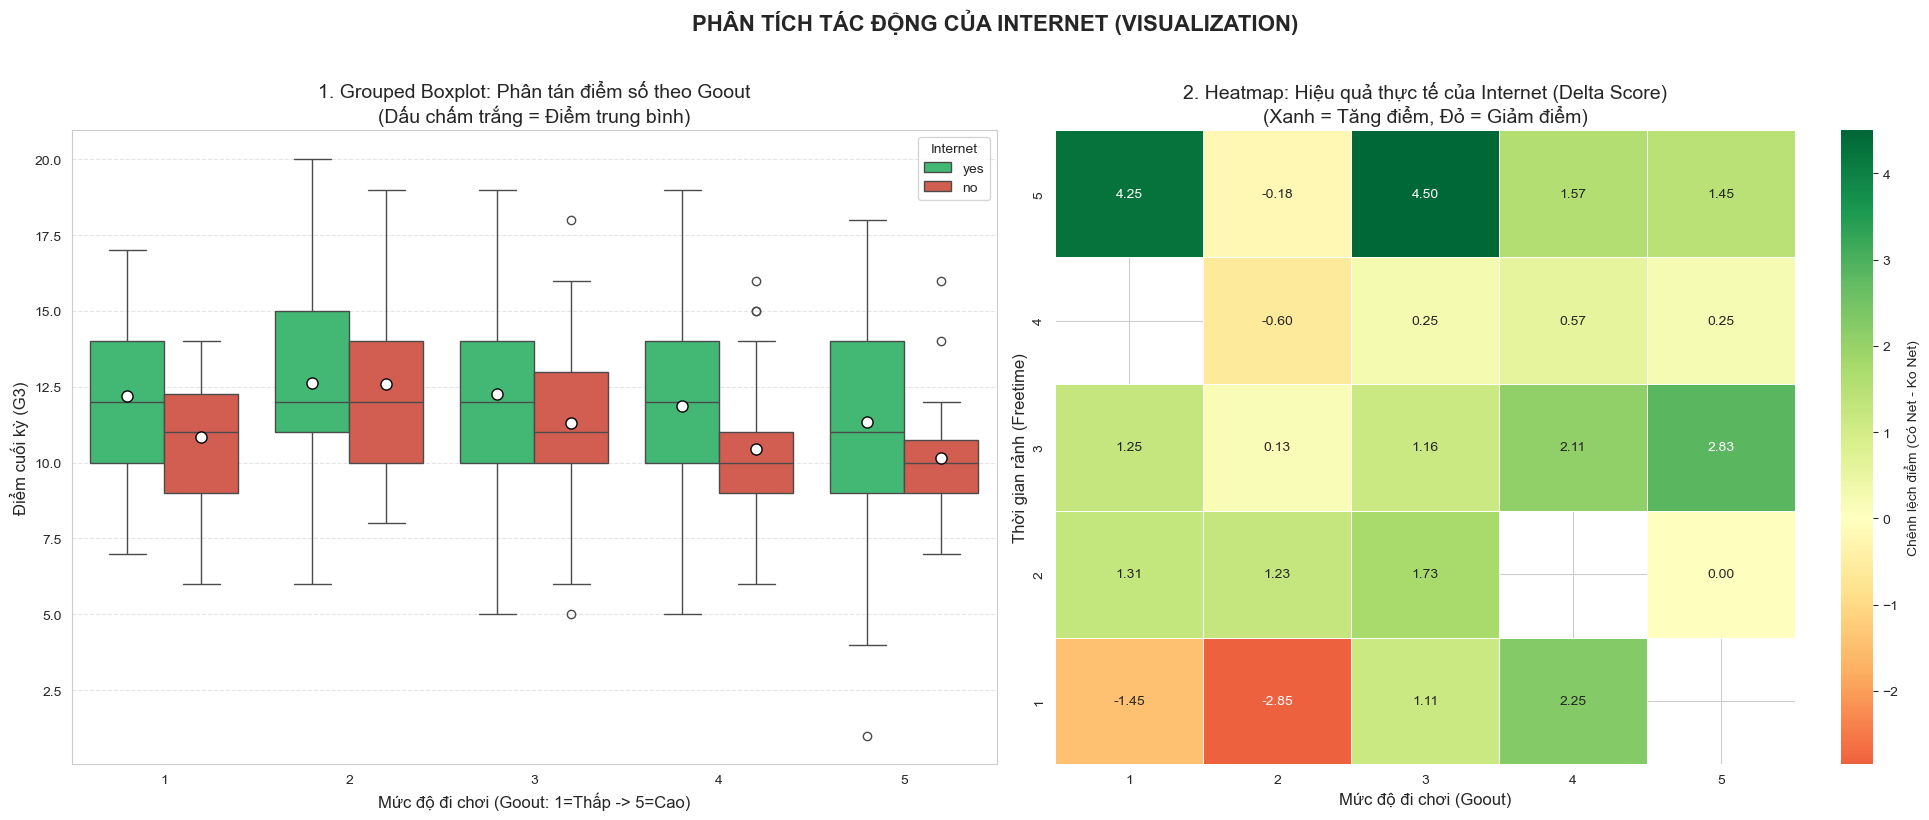

In [6]:

plt.figure(figsize=(20, 8))
plt.suptitle('PHÂN TÍCH TÁC ĐỘNG CỦA INTERNET (VISUALIZATION)', fontsize=16, fontweight='bold', y=1.02)
# GROUPED BOXPLOT
plt.subplot(1, 2, 1)

sns.boxplot(data=df, x='goout', y='G3', hue='internet', 
            palette={'yes': '#2ecc71', 'no': '#e74c3c'}, # Xanh lá (Yes) vs Đỏ (No)
            showmeans=True,
            meanprops={"marker":"o", "markerfacecolor":"white", "markeredgecolor":"black", "markersize": "8"})

plt.title('1. Grouped Boxplot: Phân tán điểm số theo Goout\n(Dấu chấm trắng = Điểm trung bình)', fontsize=14)
plt.xlabel('Mức độ đi chơi (Goout: 1=Thấp -> 5=Cao)', fontsize=12)
plt.ylabel('Điểm cuối kỳ (G3)', fontsize=12)
plt.legend(title='Internet', loc='upper right')
plt.grid(axis='y', linestyle='--', alpha=0.5)


# IMPACT HEATMAP
plt.subplot(1, 2, 2)

pivot_yes = df[df['internet'] == 'yes'].pivot_table(index='freetime', columns='goout', values='G3', aggfunc='mean')
pivot_no = df[df['internet'] == 'no'].pivot_table(index='freetime', columns='goout', values='G3', aggfunc='mean')

# Delta dương = Có Net học giỏi hơn (Màu Xanh)
# Delta âm = Có Net học kém hơn (Màu Đỏ)
delta_score = pivot_yes - pivot_no

sns.heatmap(delta_score, annot=True, fmt='.2f', cmap='RdYlGn', center=0,
            linewidths=.5, cbar_kws={'label': 'Chênh lệch điểm (Có Net - Ko Net)'})

plt.title('2. Heatmap: Hiệu quả thực tế của Internet (Delta Score)\n(Xanh = Tăng điểm, Đỏ = Giảm điểm)', fontsize=14)
plt.xlabel('Mức độ đi chơi (Goout)', fontsize=12)
plt.ylabel('Thời gian rảnh (Freetime)', fontsize=12)
plt.gca().invert_yaxis() 

plt.tight_layout()
plt.show()

Kiểm định lại bằng T-test và ANOVA để xác thực các quan sát từ biểu đồ.

In [7]:
import scipy.stats as stats
import statsmodels.api as sm
from statsmodels.formula.api import ols

for col in ['goout', 'freetime']:
    print(f"PHÂN TÍCH BIẾN: {col.upper()}")
    
    # A. ANOVA (Kiểm tra tương tác chung)
    model = ols(f'G3 ~ C(internet) * C({col})', data=df).fit()
    p_inter = sm.stats.anova_lm(model, typ=2).loc[f'C(internet):C({col})', 'PR(>F)']
    print(f"   ► ANOVA Interaction: P-value = {p_inter:.4f} -> {'CÓ' if p_inter < 0.05 else 'KHÔNG'} tương tác ý nghĩa.")

    # B. T-TEST (Kiểm tra 2 nhóm cực đoan: Thấp vs Cao)
    # Tạo danh sách các nhóm cần test: (Tên nhóm, Điều kiện lọc)
    groups = [('Nhóm Thấp (1-2)', df[col] <= 2), ('Nhóm Cao (4-5)', df[col] >= 4)]
    
    for name, condition in groups:
        sub_df = df[condition]
        yes = sub_df[sub_df['internet'] == 'yes']['G3']
        no = sub_df[sub_df['internet'] == 'no']['G3']
        
        if len(yes) > 1 and len(no) > 1: # Chỉ test khi đủ dữ liệu
            t, p = stats.ttest_ind(yes, no, equal_var=False)
            diff = yes.mean() - no.mean()
            print(f"   ► T-test {name}: Chênh lệch (Yes-No) = {diff:+.2f} điểm | P-value = {p:.4f}")
        else:
            print(f"   ► T-test {name}: Không đủ dữ liệu để kiểm định.")
print("="*65)

PHÂN TÍCH BIẾN: GOOUT
   ► ANOVA Interaction: P-value = 0.2316 -> KHÔNG tương tác ý nghĩa.
   ► T-test Nhóm Thấp (1-2): Chênh lệch (Yes-No) = +0.42 điểm | P-value = 0.2741
   ► T-test Nhóm Cao (4-5): Chênh lệch (Yes-No) = +1.32 điểm | P-value = 0.0001
PHÂN TÍCH BIẾN: FREETIME
   ► ANOVA Interaction: P-value = 0.3196 -> KHÔNG tương tác ý nghĩa.
   ► T-test Nhóm Thấp (1-2): Chênh lệch (Yes-No) = +1.12 điểm | P-value = 0.0067
   ► T-test Nhóm Cao (4-5): Chênh lệch (Yes-No) = +0.36 điểm | P-value = 0.3516


### **C. Results & Interpretation**

#### **Kết quả nghiên cứu**  

Dựa vào các kết quả phân tích trực quan và kiểm định thống kê, chúng ta có thể rút ra các nhận định rằng tác động của Internet không đồng nhất mà thay đổi theo mức thói quen sinh hoạt của học sinh, cụ thể như sau:

- Internet có tác động tích cực đối với học sinh đi chơi nhiều (goout cao), có thể vì họ sử dụng Internet để duy trì kết nối học tập khi không ở trường
- Học sinh ít đi chơi + ít thời gian rảnh (freetime thấp) lại bị ảnh hưởng tiêu cực bởi Internet - có thể do áp lực học tập cao khiến họ lạm dụng Internet để giải tỏa stress
- Không có ảnh hưởng đáng kể: Khi xét trên tổng thể (bỏ qua các yếu tố hành vi goout/freetime), việc sở hữu Internet đơn thuần (yes vs no) không tạo ra sự khác biệt lớn về điểm số trung bình giữa các học sinh.

#### **Phân tích chi tiết**  

**1. Tác động của mức độ đi chơi (`goout`)**  
Dựa vào biểu đồ Boxplot và kiểm định T-test, ta phát hiện một xu hướng nghịch lý: học sinh đi chơi nhiều lại được hưởng lợi từ Internet nhiều hơn.

- **Dẫn chứng**: 
    + Nhóm goout **CAO (4-5)**: T-test cho thấy chênh lệch +1.32 điểm (p=0.0001) - **có ý nghĩa thống kê rất cao**. Học sinh đi chơi nhiều có Internet đạt điểm cao hơn đáng kể so với không có Internet.
    + Nhóm goout **THẤP (1-2)**: Chênh lệch chỉ +0.42 điểm (p=0.2741) - **không có ý nghĩa thống kê**. Sự khác biệt giữa có và không có Internet là không rõ ràng.

- **Ý nghĩa**: Điều này cho thấy kỹ năng xã hội đóng vai trò quan trọng trong việc tận dụng Internet hiệu quả. Học sinh đi chơi nhiều có xu hướng sử dụng Internet để duy trì kết nối học tập qua nhóm bạn, diễn đàn học tập online, hoặc trao đổi bài tập. Họ có kỹ năng giao tiếp tốt hơn giúp biến Internet thành công cụ học tập thay vì chỉ giải trí.

**2. Tác động của thời gian rảnh (`freetime`)**  
Thời gian rảnh phản ánh mức độ bận rộn và khả năng sử dụng Internet có mục đích.

- **Dẫn chứng**: 
    + Nhóm freetime **THẤP (1-2)**: T-test cho thấy chênh lệch +1.12 điểm (p=0.0067) - **có ý nghĩa thống kê cao**. Học sinh có ít thời gian rảnh (bận học tập) được hưởng lợi rõ rệt từ Internet.
    + Nhóm freetime **CAO (4-5)**: Chênh lệch chỉ +0.36 điểm (p=0.3516) - **không có ý nghĩa thống kê**.

- **Ý nghĩa**: Sự chênh lệch này gợi ý rằng học sinh bận rộn có xu hướng sử dụng Internet với mục đích rõ ràng: tra cứu tài liệu, học online, làm bài tập. Ngược lại, học sinh có nhiều thời gian rảnh dễ lạm dụng Internet cho các hoạt động giải trí, làm giảm hiệu quả học tập.

**3. Phân tích tương tác hai chiều (Heatmap: Internet × Freetime × Goout)**  
Mặc dù ANOVA không cho thấy tương tác có ý nghĩa thống kê ở mức tổng thể (p>0.05), nhưng Heatmap tiết lộ những khu vực quan trọng cần chú ý.

- **Dẫn chứng**: 
    + **Vùng ĐỎ (tác động tiêu cực)**: Tập trung ở freetime=1, goout=1-2 với Delta từ -1.45 đến -2.85 điểm. Đây là nhóm học sinh **căng thẳng** (ít thời gian rảnh, ít đi chơi, áp lực cao).
    + **Vùng XANH ĐẬM (tác động tích cực mạnh)**: Freetime=5 + goout=1 (Delta: +4.25) và freetime=5 + goout=3 (Delta: +4.50). Nhóm này có nhiều thời gian nhưng kỷ luật (không đi chơi quá nhiều).
    + **Vùng XANH NHẠT**: Phần lớn các ô khác đều có Delta dương (+0.13 đến +2.83).

- **Ý nghĩa**: Điều này rất phù hợp với giả thuyết rằng ở nhóm học sinh căng thẳng, Internet không phải là công cụ học tập mà trở thành phương tiện "trốn tránh" áp lực, dẫn đến kết quả học tập giảm. Ngược lại, học sinh có thời gian rảnh nhưng có kỷ luật sẽ tận dụng Internet một cách hiệu quả nhất.

#### **Những phát hiện trong phân tích dữ liệu**

#### **Phát hiện nghịch lý**
**1. Học sinh "chăm chỉ" (ít đi chơi + ít thời gian rảnh) có Internet lại HỌC KÉM HƠN**  
Suy đoán thông thường: Học sinh kỷ luật, không đi chơi, ít thời gian rảnh sẽ tận dụng Internet cho học tập.

- **Thực tế**: Heatmap cho thấy (freetime=1, goout=1-2) có Delta **-1.45 đến -2.85 điểm** - nhóm có Internet đạt điểm **THẤP HƠN** nhóm không có Internet.
- **Giải thích**: Nhóm này có dấu hiệu **burnout** - áp lực học tập quá cao, không có lối thoát lành mạnh (ít đi chơi, ít thời gian nghỉ). Internet trở thành công cụ "trốn tránh" thực tế thay vì học tập, dẫn đến kết quả giảm sút nghiêm trọng.

**2. Học sinh đi chơi NHIỀU lại hưởng lợi TỐT NHẤT từ Internet**  
Suy đoán thông thường: Học sinh hay đi chơi sẽ bị Internet làm xao nhãng thêm, học kém đi.

- **Thực tế**: T-test cho thấy nhóm goout cao (4-5) có chênh lệch **+1.32 điểm (p<0.001)**, trong khi nhóm goout thấp (1-2) chỉ +0.42 điểm (không ý nghĩa thống kê).
- **Giải thích**: Học sinh có kỹ năng xã hội tốt biết tận dụng Internet để **học nhóm online, trao đổi bài tập, kết nối cộng đồng học tập**. Họ không bị cô lập nên sử dụng Internet hiệu quả hơn nhóm ít giao lưu.

**3. Nhiều thời gian rảnh KHÔNG giúp học tốt hơn khi có Internet**  
Suy đoán thông thường: Có nhiều thời gian rảnh + Internet = Có thể học nhiều hơn.

- **Thực tế**: T-test cho thấy nhóm freetime **CAO (4-5)** chỉ có chênh lệch +0.36 điểm (không ý nghĩa), trong khi nhóm freetime **THẤP (1-2)** lại có +1.12 điểm (p<0.01).
- **Giải thích**: Học sinh có quá nhiều thời gian rảnh dễ **lạm dụng Internet cho giải trí** thay vì học tập. Ngược lại, học sinh bận rộn buộc phải sử dụng Internet **có mục đích rõ ràng** (tra cứu nhanh, học online hiệu quả).

#### **Limitations**
- Dữ liệu không cung cấp thông tin chi tiết về cách học sinh sử dụng Internet (học tập vs giải trí).
- Mẫu nhỏ ở một số nhóm con có thể ảnh hưởng đến độ tin cậy của kết quả.